In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map



2.2.0
2.2.0


In [4]:
hdu_KG = fits.open("tables/KILOGAS_global_catalog.fits")
tab_KG = Table(hdu_KG[1].data)
tab_KG.rename_column('IAUname','IAUNAME')   
IDX_tab=[]
for tab_now in tab_KG:
    IDX = 'KG-'+tab_now['SURVEY']+'-'+tab_now['ID']
    IDX = IDX.replace('MANGA','MaNGA')
    IDX_tab.append(IDX)
IDX_tab=np.array(IDX_tab)
tab_KG['cubename']=IDX_tab



In [5]:
list_columns(tab_KG.colnames)
print(len(tab_KG))

KGAS_ID               LOGSFR_SDSS           R50_ARCSEC            FLAG_NVSS             
ID                    LOGMSTAR_BEST         R90_ARCSEC            FLUX_20CM             
SURVEY                LOGSFR_BEST           R50_KPC               FLUX_20CM_ERR         
RA                    N2HA                  SIZE_REF              FLAG_WISE             
DEC                   O3HB                  FLAG_ALMAQUEST        FLAG_HI               
Z                     BALMER                FLAG_EDGE             HIREF                 
LOGMSTAR_GSWLC        BALMER_ERR            FLAG_SAMIALMA         LOGMHI                
LOGMSTAR_ERR_GSWLC    Z_PP04_N2             FLAG_ALMAARCHIVE      ArrayConfig           
LOGSFR_GSWLC          Z_PP04_O3N2           FLAG_PACS             SB_num                
LOGSFR_ERR_GSWLC      AGNCLASS              FLAG_SPIRE            IAUNAME               
LOGMSTAR_SDSS         SERSIC                FLAG_HELP             cubename              
452


In [7]:
#hdu_nsa_mpa = fits.open("/disk-a/sanchez/home/sda2/articulos/WHaD_SDSS/analysis/tables/nsa_mpa_jhu.fits")
hdu_nsa_mpa = fits.open("/home/sanchez/sda2/articulos/WHaD_SDSS/analysis/tables/nsa_v1_0_1.fits")
tab_nsa_mpa = Table(hdu_nsa_mpa[1].data)
tab_nsa_mpa

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
str19,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,str8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661283 .. 2337.7668,-15.124495 .. -19.915525,293.50247 .. 1094.6666,-0.010805 .. 0.009306902,3.9630737e-05 .. 2.6251464e-06,6833158000.0,0.00017553588 .. 1.14686,0.004447123,0.09061434,0.025269886,0.0
J094630.85-004554.5,09h/m00/J094630.85-004554.5,146.6285851269414,-0.7651620976591762,1,-1,-1,-1,-1,-1,17.318521,0.06465632,sdss,0.06491773,1239,2,175,301,735.56384,1277.3636,1,0.06403577,2.4606192 .. 443.66675,5.447516 .. 0.006137319,1,2.6590455 .. 454.05856,-14.978118 .. -20.688284,27.979414 .

In [8]:
list_columns(tab_nsa_mpa.colnames)

IAUNAME                EXTINCTION             SERSIC_BA              ELPETRO_FLUX_IVAR_R    
SUBDIR                 SERSIC_KCORRECT        SERSIC_PHI             ELPETRO_THETA_R        
RA                     SERSIC_KCOEFF          ASYMMETRY              ELPETRO_TH50_R         
DEC                    SERSIC_MTOL            CLUMPY                 ELPETRO_TH90_R         
ISDSS                  SERSIC_B300            DFLAGS                 ELPETRO_THETA          
INED                   SERSIC_B1000           AID                    ELPETRO_FLUX           
ISIXDF                 SERSIC_METS            PID                    ELPETRO_FLUX_IVAR      
IALFALFA               SERSIC_MASS            DVERSION               ELPETRO_TH50           
IZCAT                  XCEN                   PROFTHETA              ELPETRO_TH90           
ITWODF                 YCEN                   PETRO_THETA            ELPETRO_APCORR_R       
MAG                    NPROF                  PETRO_TH50             E

In [9]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
from astropy.table import hstack as tab_hstack

In [10]:
nsa_coords = SkyCoord(ra=tab_nsa_mpa['RA'] * u.deg, dec=tab_nsa_mpa['DEC'] * u.deg)
KG_coords = SkyCoord(ra=tab_KG['RA'] * u.deg, dec=tab_KG['DEC'] * u.deg)

# Perform cross-matching with a maximum separation of 3 arcseconds
idx, d2d, _ = nsa_coords.match_to_catalog_sky(KG_coords)
max_sep = 10 * u.arcsec
sep_constraint = d2d < max_sep

# Filter matched rows based on separation constraint
nsa_matched = tab_nsa_mpa[sep_constraint]
KG_matched = tab_KG[idx[sep_constraint]]
dist = d2d[sep_constraint]

# Join matched rows into a single table

#matched_table = join(nsa_matched, KG_matched, join_type='inner',table_names=['', 'KG'])
matched_table = tab_hstack([nsa_matched, KG_matched['ID']], join_type='inner',table_names=['SDSS', 'KG'])
matched_table['dist_NSA'] = dist*3600*u.arcsec
#matched_table['RA'] = 0.5*matched_table['RA_1']+0.5*matched_table['RA_2']
#matched_table['DEC'] = 0.5*matched_table['DEC_1']+0.5*matched_table['DEC_2']


In [11]:
print(len(tab_KG))
print(len(matched_table))
#matched_table
tab_KG_nsa = join(tab_KG, matched_table, join_type='left',keys=['ID'])
tab_KG_nsa.rename_columns(['SURVEY_1','RA_1','DEC_1','Z_1','IAUNAME_1'],['SURVEY','RA','DEC','Z','IAUNAME'])
tab_KG_nsa.rename_columns(['SURVEY_2','RA_2','DEC_2','Z_2','IAUNAME_2'],['SURVEY_NSA','RA_NSA','DEC_NSA','Z_NSA','IAUNAME_NSA'])
list_columns(tab_KG_nsa.columns)

452
430
KGAS_ID                LOGMHI                 SERSIC_METS            DECCAT                 
ID                     ArrayConfig            SERSIC_MASS            ZSDSSLINE              
SURVEY                 SB_num                 XCEN                   SURVEY_NSA             
RA                     IAUNAME                YCEN                   PROGRAMNAME            
DEC                    cubename               NPROF                  PLATEQUALITY           
Z                      IAUNAME_NSA            PROFMEAN               TILE                   
LOGMSTAR_GSWLC         SUBDIR                 PROFMEAN_IVAR          PLUG_RA                
LOGMSTAR_ERR_GSWLC     RA_NSA                 QSTOKES                PLUG_DEC               
LOGSFR_GSWLC           DEC_NSA                USTOKES                ELPETRO_BA             
LOGSFR_ERR_GSWLC       ISDSS                  BASTOKES               ELPETRO_PHI            
LOGMSTAR_SDSS          INED                   PHISTOKES       

In [12]:
tab_KG_nsa

KGAS_ID,ID,SURVEY,RA,DEC,Z,LOGMSTAR_GSWLC,LOGMSTAR_ERR_GSWLC,LOGSFR_GSWLC,LOGSFR_ERR_GSWLC,LOGMSTAR_SDSS,LOGSFR_SDSS,LOGMSTAR_BEST,LOGSFR_BEST,N2HA,O3HB,BALMER,BALMER_ERR,Z_PP04_N2,Z_PP04_O3N2,AGNCLASS,SERSIC,R50_ARCSEC,R90_ARCSEC,R50_KPC,SIZE_REF,FLAG_ALMAQUEST,FLAG_EDGE,FLAG_SAMIALMA,FLAG_ALMAARCHIVE,FLAG_PACS,FLAG_SPIRE,FLAG_HELP,FLAG_NVSS,FLUX_20CM,FLUX_20CM_ERR,FLAG_WISE,FLAG_HI,HIREF,LOGMHI,ArrayConfig,SB_num,IAUNAME,cubename,IAUNAME_NSA,SUBDIR,RA_NSA,DEC_NSA,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z_NSA,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY_NSA,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,dist_NSA
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec deg
int64,str23,str11,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,int16,int16,int16,float32,str2,int64,str20,str17,str19,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,str8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64,float64
429,1-1037,MANGA,149.6573028564453,0.8707600235939026,0.03903,9.672,0.057,0.004,0.089,9.635492,-0.03221991,9.672,0.004,-0.6920765,0.031415947,3.9111524,0.08167199,8.462511,8.498482,1,1.6806521,5.105556,12.64564,3.9468377,1,0,0,0,0,0,1,1,-9,-99.0,-99.0,1,2,2,9.763192,C2,48,J095837.75+005214.74,KG-MaNGA-1-1037,J095837.75+005214.6,09h/p00/J095837.75+005214.6,149.65731173924053,0.8707628194648471,1099,75010,-1,-1,172186,122793,16.858692,0.039029263,sdss,0.07,2141,6,47,301,361.1732,980.382,1099,0.038422957,14.068931 .. 430.07,3.0887156 .. 0.006435836,1,13.919446 .. 428.5717,-15.749397 .. -19.461483,518.62256 .. 1009.7982,0.21863294 .. 0.0390058,0.008824934 .. 0.007716817,9.8151595e-06 .. 1.3586103e-06,3.7382295e-05 .. 0.6597849,0.023349695,0.31224507,0.030079909,2548499700.0,115.4252700805664,146.71743774414062,10 .. 11,0.29171476 .. 0.0,3125.9937 .. 0.0,-0.009309325 .. -3.2692344,0.00074376696 .. 3.4218447,0.9814949 .. 

ELPETRO_TH50
------------
    5.105556
   7.5472426
    2.255412
    1.913222
   2.1652818
   5.8834763
   6.9108887
         ...
    6.559829
   1.3875258
   3.2889109
          --
    4.266801
   3.4137852
    9.374365
   9.1238985
Length = 452 rows


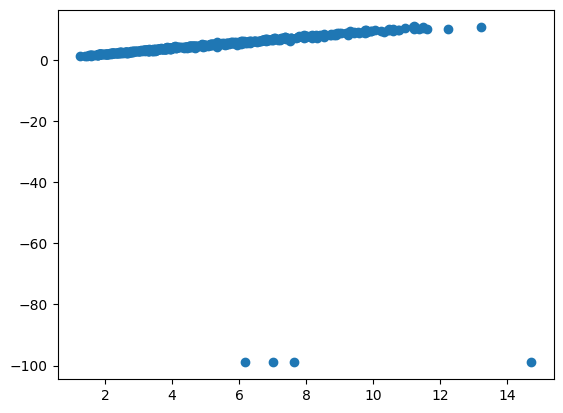

In [53]:
print(tab_KG_nsa['ELPETRO_TH50'][:,4])
plt.scatter(tab_KG_nsa['ELPETRO_TH50'][:,3],tab_KG_nsa['R50_ARCSEC'])
#tab_KG_nsa[tab_KG_nsa['IAUNAME']=='J143406.70+003626.60']

In [ ]:
## plt.scatter(tab_KG_nsa['ELPETRO_TH50'][:,4],tab_KG_nsa['R50_ARCSEC'])
plt.xlim(0,15)
plt.ylim(0,15)
plt.plot([0,15],[0,15],color='black')
plt.xlabel('ELPETRO_TH50 r-band')
plt.ylabel('R50_ARCSEC r-band')

d_Re = np.abs(tab_KG_nsa['ELPETRO_TH50'][:,3]-tab_KG_nsa['R50_ARCSEC'])
mask_d_Re = (d_Re>2)
tab_KG_nsa['cubename','ELPETRO_TH50','R50_ARCSEC'][mask_d_Re]
for vals in tab_KG_nsa['cubename','ELPETRO_TH50','R50_ARCSEC'][mask_d_z]:
    print(np.array(vals))
    
print(len(tab_KG_nsa['cubename','ELPETRO_TH50','R50_ARCSEC'][mask_d_Re]))    



KG-MaNGA-1-118238
KG-MaNGA-1-180172
KG-MaNGA-1-180513
KG-MaNGA-1-382729
KG-MaNGA-1-412000
KG-MaNGA-1-81110
KG-SAMI-202398
KG-SAMI-202531
KG-SAMI-202745
KG-SAMI-208520
KG-SAMI-278773
KG-SAMI-296829
KG-SAMI-300406
KG-SAMI-300411
KG-SAMI-319018
KG-SAMI-323575
KG-SAMI-346046
KG-SAMI-396833
KG-SAMI-513236
KG-SAMI-549182
KG-SAMI-570174
KG-SAMI-573586
KG-SAMI-592863
KG-SAMI-599310
KG-SAMI-622084
KG-SAMI-63027
KG-SAMI-77845
KG-SAMI-93020
28


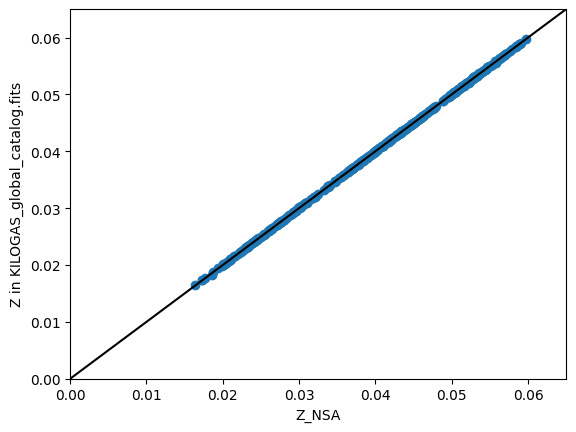

In [66]:
plt.scatter(tab_KG_nsa['Z_NSA'],tab_KG_nsa['Z'])
plt.xlim(0,0.065)
plt.ylim(0,0.065)
plt.plot([0,0.065],[0,0.065],color='black')
plt.xlabel('Z_NSA')
plt.ylabel('Z in KILOGAS_global_catalog.fits')
d_z = np.abs(tab_KG_nsa['Z_NSA']-tab_KG_nsa['Z'])
mask_d_z = (d_z>0.001)
for vals in tab_KG_nsa['cubename'][mask_d_z | mask_d_Re]:
    print(np.array(vals))

print(len(tab_KG_nsa[mask_d_z | mask_d_Re]))        
    

## plt.scatter(tab_KG_nsa['PETRO_PHI50'],tab_KG_nsa['PETRO_BA50'])
tab_KG_nsa[tab_KG_nsa['IAUNAME']=='J143406.70+003626.60']

In [61]:
#
# Galaxies not matched with NSA
#
mask_IDX = []
for IDX in tab_KG['ID']:
    mask_now = IDX in KG_matched['ID']
    mask_IDX.append(mask_now)
mask_IDX = np.array(mask_IDX)
print(tab_KG[~mask_IDX])



KGAS_ID   ID   SURVEY ... SB_num       IAUNAME           cubename   
------- ------ ------ ... ------ -------------------- --------------
     80  93020   SAMI ...      9 J143406.70+003626.60  KG-SAMI-93020
    132 346046   SAMI ...     14 J084829.02+020433.67 KG-SAMI-346046
    133 323575   SAMI ...     14 J084901.38+013426.22 KG-SAMI-323575
    135 278773   SAMI ...     14 J085432.40+005112.60 KG-SAMI-278773
    191 202531   SAMI ...     20 J084039.84-002447.92 KG-SAMI-202531
    205 319018   SAMI ...     21 J141313.03+014658.01 KG-SAMI-319018
    253 622084   SAMI ...     26 J084258.35+003838.58 KG-SAMI-622084
    254 208520   SAMI ...     26 J083738.19+000302.41 KG-SAMI-208520
    276 570174   SAMI ...     28 J145025.21-002809.55 KG-SAMI-570174
    290 513236   SAMI ...     29 J145016.67-010615.70 KG-SAMI-513236
    301 573586   SAMI ...     31 J083630.14-000510.46 KG-SAMI-573586
    303 549182   SAMI ...     31 J084243.85-002856.93 KG-SAMI-549182
    305 599310   SAMI ...     31 J

In [62]:
tab=join(tab_KG,tab_nsa_mpa,keys=['IAUNAME'],join_type='left',table_names=['KG', ''])

In [63]:
tab

KGAS_ID,ID,SURVEY_KG,RA_KG,DEC_KG,Z_KG,LOGMSTAR_GSWLC,LOGMSTAR_ERR_GSWLC,LOGSFR_GSWLC,LOGSFR_ERR_GSWLC,LOGMSTAR_SDSS,LOGSFR_SDSS,LOGMSTAR_BEST,LOGSFR_BEST,N2HA,O3HB,BALMER,BALMER_ERR,Z_PP04_N2,Z_PP04_O3N2,AGNCLASS,SERSIC,R50_ARCSEC,R90_ARCSEC,R50_KPC,SIZE_REF,FLAG_ALMAQUEST,FLAG_EDGE,FLAG_SAMIALMA,FLAG_ALMAARCHIVE,FLAG_PACS,FLAG_SPIRE,FLAG_HELP,FLAG_NVSS,FLUX_20CM,FLUX_20CM_ERR,FLAG_WISE,FLAG_HI,HIREF,LOGMHI,ArrayConfig,SB_num,IAUNAME,cubename,SUBDIR,RA_,DEC_,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z_,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY_,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
int64,str23,str11,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,int16,int16,int16,float32,str2,int64,str20,str17,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,str8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64
27,1-39880,MANGA,14.044469833374023,15.121370315551758,0.04088,9.86,0.044,-0.152,0.11,9.766745,-0.09518991,9.86,-0.152,-0.54494596,-0.2723431,3.6733592,0.11236262,8.586151,8.642767,1,0.7641186,4.502916,9.326559,3.637931,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,2,2,9.705595,C2,3,J005610.67+150716.93,KG-MaNGA-1-39880,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-- .. --,-- .. --,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,--,--,--,-- .. --,-- .. --,-- .. --,--,--,--,-- .. --,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,--,-- .. --,-- .. --,-- .. --,-- .. --,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,-- .. --,--,--,--,--
26,1-39995,MANGA,14.956279754638672,14.327930450439453,0.03979,9.977,0.027,-0.439,0.114,9.8827095,-0.4234499,9.977,-0.439,-0.69928366,-0.07882253,4.0452986,0.31347105,8.457168,8.531452,1,0.92918605,9.566134,20.11353,7.5322447,1,0,0,0,0,0,0,0,-9,-99.0,-9

In [64]:
tab_KG

KGAS_ID,ID,SURVEY,RA,DEC,Z,LOGMSTAR_GSWLC,LOGMSTAR_ERR_GSWLC,LOGSFR_GSWLC,LOGSFR_ERR_GSWLC,LOGMSTAR_SDSS,LOGSFR_SDSS,LOGMSTAR_BEST,LOGSFR_BEST,N2HA,O3HB,BALMER,BALMER_ERR,Z_PP04_N2,Z_PP04_O3N2,AGNCLASS,SERSIC,R50_ARCSEC,R90_ARCSEC,R50_KPC,SIZE_REF,FLAG_ALMAQUEST,FLAG_EDGE,FLAG_SAMIALMA,FLAG_ALMAARCHIVE,FLAG_PACS,FLAG_SPIRE,FLAG_HELP,FLAG_NVSS,FLUX_20CM,FLUX_20CM_ERR,FLAG_WISE,FLAG_HI,HIREF,LOGMHI,ArrayConfig,SB_num,IAUNAME,cubename
int64,str23,str11,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,int16,int16,int16,float32,str2,int64,str20,str17
1,1-178894,MANGA,314.5881042480469,-0.35113999247550964,0.05285,10.623,0.02,-2.245,0.639,10.609994,-1.23214,10.623,-2.245,-0.081225544,-0.0008421099,1.5782075,0.3452157,9.213254,8.704277,2,4.8857927,2.320328,7.4042645,2.3893187,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,-9,-9,-99.0,C2,0,J205821.15-002104.10,KG-MaNGA-1-178894
2,1-179173,MANGA,314.5533752441406,-0.3243899941444397,0.05264,10.668,0.035,-0.816,1.01,10.667042,-1.2501199,10.668,-0.816,-0.036621608,0.18301708,2.2594492,0.5519009,9.297333,8.659715,3,3.9337363,2.764213,7.607959,2.8357954,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,-9,-9,-99.0,C2,0,J205812.81-001927.80,KG-MaNGA-1-179173
3,1-179071,MANGA,313.7587890625,-0.039969999343156815,0.05249,10.465,0.051,0.563,0.114,10.443735,0.9133401,10.465,0.563,-0.4191595,-0.28347042,4.874192,0.08326789,8.716915,8.686579,1,3.0689113,6.1513886,16.195345,6.293819,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,-9,-9,-99.0,C2,0,J205502.11-000223.89,KG-MaNGA-1-179071
4,1-178794,MANGA,310.8828430175781,0.963379979133606,0.05089,10.655,0.011,-0.989,0.211,10.63279,-1.31125,10.655,-0.989,0.16089667,nan,nan,nan,9.730572,nan,0,3.101069,2.1478245,6.2456813,2.134607,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,-9,-9,-99.0,C2,0,J204331.88+005748.17,KG-MaNGA-1-178794
5,1-54940,MANGA,144.53671264648438,1.4491599798202515,0.04578,10.46,0.019,-0.191,0.103,10.366038,-0.107449904,10.46,-0.191,-0.11807627,0.83848697,4.82871,0.38870245,9.147346,8.4239,4,0.54942983,5.0828276,9.722165,4.571927,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,2,2,10.072984,C2,1,J093808.81+012656.98,KG-MaNGA-1-54940
6,1-277,MANGA,146.51539611816406,0.16681000590324402,0.04892,9.935,0.05,-0.016,0.105,9.808366,0.104650095,9.935,-0.016,-0.44932115,-0.3503872,3.8629534,0.12038048,8.683231,8.69834,1,1.3003049,5.8137746,14.262073,5.5673018,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,1,2,10.07,C2,1,J094603.70+001000.52,KG-MaNGA-1-277
7,1-55227,MANGA,146.57606506347656,2.8843400478363037,0.04746,10.353,0.05,0.424,0.226,10.229027,0.3536601,10.353,0.424,-0.4538082,-0.6710217,3.3505013,0.0692256,8.67835,8.799508,1,1.1034205,3.197625,6.8815346,2.9758244,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,2,2,9.977614,C2,1,J094618.26+025303.62,KG-MaNGA-1-55227
8,1-954,MANGA,149.20582580566406,1.1205099821090698,0.04705,10.46,0.014,-0.984,0.123,10.476883,-1.2375499,10.46,-0.984,0.029170804,0.20821443,1.8112577,0.52786016,9.430296,8.672706,3,6.0,3.053145,8.4320755,2.8181906,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,2,2,10.132503,C2,1,J095649.40+010713.84,KG-MaNGA-1-954
9,1-383,MANGA,149.11256408691406,0.12973999977111816,0.04579,10.173,0.042,0.191,0.163,10.053984,0.12894009,10.173,0.191,-0.6453269,-0.030143593,4.4053283,0.14864746,8.498711,8.533141,1,1.5694531,4.350979,10.877237,3.914449,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,1,2,10.05,C2,1,J095627.02+000747.06,KG-MaNGA-1-383


In [85]:
tab_KG_nsa.sort('KGAS_ID')

tab_KG_nsa.write('tables/KG_NSA.ext.ecsv',overwrite=True,delimiter=',')
hdu_KG_nsa = fits.BinTableHDU(tab_KG_nsa)
hdu_KG_nsa.name='KILOGAS_NSA'
hdu_list =fits.HDUList([empty_primary,hdu_KG_sel])
hdu_list.writeto('tables/KG_NSA.fits',overwrite=True)



In [87]:
tab_KG_sel = tab_KG_nsa['KGAS_ID','cubename','IAUNAME','RA','DEC','Z','R50_ARCSEC','PETRO_PHI50','PETRO_BA50']
empty_primary = fits.PrimaryHDU()
hdu_KG_sel = fits.BinTableHDU(tab_KG_sel)
hdu_KG_sel.name='KILOGAS'
hdu_list =fits.HDUList([empty_primary,hdu_KG_sel])
hdu_list.writeto('tables/tab_KG_sel.fits',overwrite=True)
tab_KG_sel.write('tables/tab_KG_sel.ecsv',overwrite=True,delimiter=',')
tab_KG_sel

KGAS_ID,cubename,IAUNAME,RA,DEC,Z,R50_ARCSEC,PETRO_PHI50,PETRO_BA50
int64,str17,str20,float64,float64,float32,float32,float32,float32
1,KG-MaNGA-1-178894,J205821.15-002104.10,314.5881042480469,-0.35113999247550964,0.05285,2.320328,132.40863,0.8425276
2,KG-MaNGA-1-179173,J205812.81-001927.80,314.5533752441406,-0.3243899941444397,0.05264,2.764213,124.2746,0.7704078
3,KG-MaNGA-1-179071,J205502.11-000223.89,313.7587890625,-0.039969999343156815,0.05249,6.1513886,128.37317,0.619442
4,KG-MaNGA-1-178794,J204331.88+005748.17,310.8828430175781,0.963379979133606,0.05089,2.1478245,160.05466,0.8192031
5,KG-MaNGA-1-54940,J093808.81+012656.98,144.53671264648438,1.4491599798202515,0.04578,5.0828276,109.6221,0.8603322
6,KG-MaNGA-1-277,J094603.70+001000.52,146.51539611816406,0.16681000590324402,0.04892,5.8137746,20.469162,0.7563583
7,KG-MaNGA-1-55227,J094618.26+025303.62,146.57606506347656,2.8843400478363037,0.04746,3.197625,147.38031,0.95408857
8,KG-MaNGA-1-954,J095649.40+010713.84,149.20582580566406,1.1205099821090698,0.04705,3.053145,83.187225,0.89617413
9,KG-MaNGA-1-383,J095627.02+000747.06,149.11256408691406,0.12973999977111816,0.04579,4.350979,14.845978,0.7274175


In [78]:
tab_KG_sel['PETRO_PHI50'].fill_value = np.nan 
tab_KG_sel['PETRO_PHI50']=tab_KG_sel['PETRO_PHI50'].filled()
tab_KG_sel['PETRO_BA50'].fill_value = np.nan 
tab_KG_sel['PETRO_BA50']=tab_KG_sel['PETRO_BA50'].filled()

mask_pa_ba = ((tab_KG_sel['PETRO_PHI50'])>-0.1) & ((tab_KG_sel['PETRO_PHI50'])<181) & \
((tab_KG_sel['PETRO_BA50'])>-0.1) & ((tab_KG_sel['PETRO_BA50'])<1.1)

print(len(tab_KG_sel[mask_pa_ba]))

tab_KG_sel[tab_KG_sel['IAUNAME']=='J143406.70+003626.60']
#plt.scatter(tab['LOGMSTAR_BEST'],tab['ELPETRO_MASS'])

430


KGAS_ID,cubename,IAUNAME,RA,DEC,Z,R50_ARCSEC,PETRO_PHI50,PETRO_BA50
int64,str17,str20,float64,float64,float32,float32,float32,float32
80,KG-SAMI-93020,J143406.70+003626.60,218.52792358398438,0.6073899865150452,0.03161,2.14,nan,nan


In [79]:
tab

KGAS_ID,ID,SURVEY_KG,RA_KG,DEC_KG,Z_KG,LOGMSTAR_GSWLC,LOGMSTAR_ERR_GSWLC,LOGSFR_GSWLC,LOGSFR_ERR_GSWLC,LOGMSTAR_SDSS,LOGSFR_SDSS,LOGMSTAR_BEST,LOGSFR_BEST,N2HA,O3HB,BALMER,BALMER_ERR,Z_PP04_N2,Z_PP04_O3N2,AGNCLASS,SERSIC,R50_ARCSEC,R90_ARCSEC,R50_KPC,SIZE_REF,FLAG_ALMAQUEST,FLAG_EDGE,FLAG_SAMIALMA,FLAG_ALMAARCHIVE,FLAG_PACS,FLAG_SPIRE,FLAG_HELP,FLAG_NVSS,FLUX_20CM,FLUX_20CM_ERR,FLAG_WISE,FLAG_HI,HIREF,LOGMHI,ArrayConfig,SB_num,IAUNAME,cubename,SUBDIR,RA_,DEC_,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z_,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY_,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
int64,str23,str11,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,int16,int16,int16,float32,str2,int64,str20,str17,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,str8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64
27,1-39880,MANGA,14.044469833374023,15.121370315551758,0.04088,9.86,0.044,-0.152,0.11,9.766745,-0.09518991,9.86,-0.152,-0.54494596,-0.2723431,3.6733592,0.11236262,8.586151,8.642767,1,0.7641186,4.502916,9.326559,3.637931,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,2,2,9.705595,C2,3,J005610.67+150716.93,KG-MaNGA-1-39880,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-- .. --,-- .. --,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,--,--,--,-- .. --,-- .. --,-- .. --,--,--,--,-- .. --,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,--,-- .. --,-- .. --,-- .. --,-- .. --,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,-- .. --,--,--,--,--
26,1-39995,MANGA,14.956279754638672,14.327930450439453,0.03979,9.977,0.027,-0.439,0.114,9.8827095,-0.4234499,9.977,-0.439,-0.69928366,-0.07882253,4.0452986,0.31347105,8.457168,8.531452,1,0.92918605,9.566134,20.11353,7.5322447,1,0,0,0,0,0,0,0,-9,-99.0,-9

In [80]:
tab_KG[tab_KG['IAUNAME']=='J005610.67+150716.93']

KGAS_ID,ID,SURVEY,RA,DEC,Z,LOGMSTAR_GSWLC,LOGMSTAR_ERR_GSWLC,LOGSFR_GSWLC,LOGSFR_ERR_GSWLC,LOGMSTAR_SDSS,LOGSFR_SDSS,LOGMSTAR_BEST,LOGSFR_BEST,N2HA,O3HB,BALMER,BALMER_ERR,Z_PP04_N2,Z_PP04_O3N2,AGNCLASS,SERSIC,R50_ARCSEC,R90_ARCSEC,R50_KPC,SIZE_REF,FLAG_ALMAQUEST,FLAG_EDGE,FLAG_SAMIALMA,FLAG_ALMAARCHIVE,FLAG_PACS,FLAG_SPIRE,FLAG_HELP,FLAG_NVSS,FLUX_20CM,FLUX_20CM_ERR,FLAG_WISE,FLAG_HI,HIREF,LOGMHI,ArrayConfig,SB_num,IAUNAME,cubename
int64,str23,str11,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,int16,int16,int16,float32,str2,int64,str20,str17
27,1-39880,MANGA,14.044469833374023,15.121370315551758,0.04088,9.86,0.044,-0.152,0.11,9.766745,-0.09518991,9.86,-0.152,-0.54494596,-0.2723431,3.6733592,0.11236262,8.586151,8.642767,1,0.7641186,4.502916,9.326559,3.637931,1,0,0,0,0,0,0,0,-9,-99.0,-99.0,1,2,2,9.705595,C2,3,J005610.67+150716.93,KG-MaNGA-1-39880


In [81]:
# J094651.40-010228.5
tab_nsa_mpa[tab_nsa_mpa['IAUNAME']=='J094651.40-010228.5']


IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
str19,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,str8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661283 .. 2337.7668,-15.124495 .. -19.915525,293.50247 .. 1094.6666,-0.010805 .. 0.009306902,3.9630737e-05 .. 2.6251464e-06,6833158000.0,0.00017553588 .. 1.14686,0.004447123,0.09061434,0.025269886,0.0


In [93]:
get_mag_cubes_SAMI="tables/get_mag_cubes_SAMI_KG_reshift.csv"
col_mag_cubes_SAMI=header_columns_space(get_mag_cubes_SAMI,2)
tab_mag_SAMI=ascii.read(get_mag_cubes_SAMI, delimiter=',', \
                        guess=True, comment='\s*#', names=col_mag_cubes_SAMI,\
                      fill_values=[('BAD', np.nan)])
cubenames=[]
for name in tab_mag_SAMI['name-obj']:
    name = name.replace('SAMI','SAMI-')
    name = 'KG-'+name
    cubenames.append(name)
cubenames = np.array(cubenames)
tab_mag_SAMI['cubename'] = cubenames

In [94]:
tab_mag_SAMI
list_columns(tab_mag_SAMI.columns)

name-obj                   i_band_mag_error           Y_centroid                 SN_at_R50                  
redshift                   i_band_abs_mag             Re                         error_SN_at_R50            
error_redshift             i_band_abs_mag_error       error_Re                   R_50                       
u_band_mag                 B_band_mag                 mean_S/N_at_Re             error_Re1                  
u_band_mag_error           B_band_mag_error           sigma_S/N_at_Re            B-V                        
u_band_abs_mag             B_band_abs_mag             ellipticy                  error_B-V                  
u_band_abs_mag_error       B_band_abs_mag_error       Pa                         B-R                        
g_band_mag                 V_band_mag                 R50                        error_B-R                  
g_band_mag_error           V_band_mag_error           error_R50                  log10_Mass/Msun_phot.      
g_band_abs_mag     

In [92]:
list_columns(tab_KG_nsa.columns)

KGAS_ID                LOGMHI                 SERSIC_METS            DECCAT                 
ID                     ArrayConfig            SERSIC_MASS            ZSDSSLINE              
SURVEY                 SB_num                 XCEN                   SURVEY_NSA             
RA                     IAUNAME                YCEN                   PROGRAMNAME            
DEC                    cubename               NPROF                  PLATEQUALITY           
Z                      IAUNAME_NSA            PROFMEAN               TILE                   
LOGMSTAR_GSWLC         SUBDIR                 PROFMEAN_IVAR          PLUG_RA                
LOGMSTAR_ERR_GSWLC     RA_NSA                 QSTOKES                PLUG_DEC               
LOGSFR_GSWLC           DEC_NSA                USTOKES                ELPETRO_BA             
LOGSFR_ERR_GSWLC       ISDSS                  BASTOKES               ELPETRO_PHI            
LOGMSTAR_SDSS          INED                   PHISTOKES              E

In [95]:
tab_KG_mag_SAMI=join(tab_mag_SAMI,tab_KG_nsa,keys=['cubename'],join_type='left')#,table_names=['KG', ''])

In [97]:
print(len(tab_KG_mag_SAMI))

169


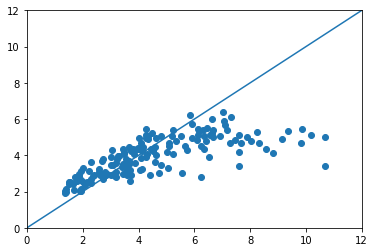

In [127]:
c = np.sqrt(1-(tab_KG_mag_SAMI['ellipticy']-0.1)**2)
plt.scatter(tab_KG_mag_SAMI['R50_ARCSEC'],tab_KG_mag_SAMI['R50']/c*0.7)
plt.xlim(0,12)
plt.ylim(0,12)
plt.plot([0,12],[0,12])


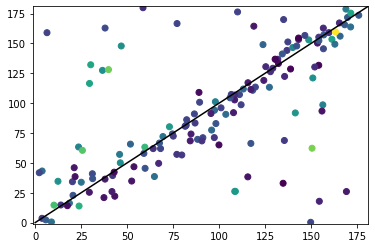

In [135]:
#c = np.sqrt(1-(tab_KG_mag_SAMI['ellipticy']-0.1)**2)
plt.scatter(tab_KG_mag_SAMI['PETRO_PHI50'],tab_KG_mag_SAMI['Pa']+90,c=tab_KG_mag_SAMI['R50_ARCSEC']*tab_KG_mag_SAMI['PETRO_BA50'])
plt.xlim(-1,181)
plt.ylim(-1,181)
plt.plot([0,181],[0,181],color='black')


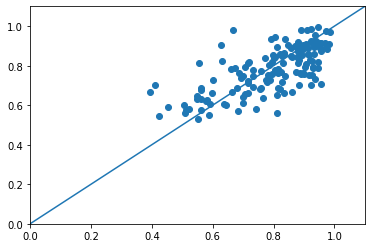

In [113]:
plt.scatter(tab_KG_mag_SAMI['PETRO_BA50'],np.sqrt(1-(tab_KG_mag_SAMI['ellipticy']-0.1)**2))
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.plot([0,1.1],[0,1.1])


In [156]:
PHI50 = []
BA50 = []

for tab_now in tab_KG_sel:
    cubename = tab_now['cubename']
    tab_mag_now = tab_mag_SAMI[tab_mag_SAMI['cubename']==cubename]
    if ((len(tab_mag_now)>0) and ((not np.isfinite(tab_now['PETRO_PHI50'])) or (not np.isfinite(tab_now['PETRO_BA50'])))):
        phi50 = tab_mag_now['Pa']+90
        ba50 = np.sqrt(1-(tab_mag_now['ellipticy']-0.1)**2)
    else:
        phi50 = tab_now['PETRO_PHI50']*1.0
        ba50 = tab_now['PETRO_BA50']*1.0
    PHI50.append(phi50)
    BA50.append(ba50)
PHI50 = np.array(PHI50)
BA50 = np.array(BA50)
#            tab_mag_SAMI[tab_mag_SAMI['cubename']==cubename]['PETRO']
#        print(tab_mag_now)
#    if (tab_now['PETRO_PHI50'])

In [159]:
tab_KG_sel['PA'] = PHI50.astype(float)
tab_KG_sel['BA'] = BA50.astype(float)
tab_KG_sel

KGAS_ID,cubename,IAUNAME,RA,DEC,Z,R50_ARCSEC,PETRO_PHI50,PETRO_BA50,PA,BA
int64,str17,str20,float64,float64,float32,float32,float32,float32,float64,float64
1,KG-MaNGA-1-178894,J205821.15-002104.10,314.5881042480469,-0.35113999247550964,0.05285,2.320328,132.40863,0.8425276,132.40863037109375,0.8425276279449463
2,KG-MaNGA-1-179173,J205812.81-001927.80,314.5533752441406,-0.3243899941444397,0.05264,2.764213,124.2746,0.7704078,124.27459716796875,0.7704077959060669
3,KG-MaNGA-1-179071,J205502.11-000223.89,313.7587890625,-0.039969999343156815,0.05249,6.1513886,128.37317,0.619442,128.3731689453125,0.6194419860839844
4,KG-MaNGA-1-178794,J204331.88+005748.17,310.8828430175781,0.963379979133606,0.05089,2.1478245,160.05466,0.8192031,160.05465698242188,0.8192030787467957
5,KG-MaNGA-1-54940,J093808.81+012656.98,144.53671264648438,1.4491599798202515,0.04578,5.0828276,109.6221,0.8603322,109.62210083007812,0.860332190990448
6,KG-MaNGA-1-277,J094603.70+001000.52,146.51539611816406,0.16681000590324402,0.04892,5.8137746,20.469162,0.7563583,20.469161987304688,0.7563583254814148
7,KG-MaNGA-1-55227,J094618.26+025303.62,146.57606506347656,2.8843400478363037,0.04746,3.197625,147.38031,0.95408857,147.38031005859375,0.954088568687439
8,KG-MaNGA-1-954,J095649.40+010713.84,149.20582580566406,1.1205099821090698,0.04705,3.053145,83.187225,0.89617413,83.18722534179688,0.8961741328239441
9,KG-MaNGA-1-383,J095627.02+000747.06,149.11256408691406,0.12973999977111816,0.04579,4.350979,14.845978,0.7274175,14.845977783203125,0.727417528629303


In [160]:
#tab_KG_sel['PA'] = PHI50
#tab_KG_sel['BA'] = BA50

#tab_KG_sel = t1ab_KG_nsa['KGAS_ID','cubename','IAUNAME','RA','DEC','Z','R50_ARCSEC','PETRO_PHI50','PETRO_BA50']
empty_primary = fits.PrimaryHDU()
hdu_KG_sel = fits.BinTableHDU(tab_KG_sel)
hdu_KG_sel.name='KILOGAS'
hdu_list =fits.HDUList([empty_primary,hdu_KG_sel])
hdu_list.writeto('tables/tab_KG_sel_add.fits',overwrite=True)
tab_KG_sel.write('tables/tab_KG_sel_add.ecsv',overwrite=True,delimiter=',')
tab_KG_sel

KGAS_ID,cubename,IAUNAME,RA,DEC,Z,R50_ARCSEC,PETRO_PHI50,PETRO_BA50,PA,BA
int64,str17,str20,float64,float64,float32,float32,float32,float32,float64,float64
1,KG-MaNGA-1-178894,J205821.15-002104.10,314.5881042480469,-0.35113999247550964,0.05285,2.320328,132.40863,0.8425276,132.40863037109375,0.8425276279449463
2,KG-MaNGA-1-179173,J205812.81-001927.80,314.5533752441406,-0.3243899941444397,0.05264,2.764213,124.2746,0.7704078,124.27459716796875,0.7704077959060669
3,KG-MaNGA-1-179071,J205502.11-000223.89,313.7587890625,-0.039969999343156815,0.05249,6.1513886,128.37317,0.619442,128.3731689453125,0.6194419860839844
4,KG-MaNGA-1-178794,J204331.88+005748.17,310.8828430175781,0.963379979133606,0.05089,2.1478245,160.05466,0.8192031,160.05465698242188,0.8192030787467957
5,KG-MaNGA-1-54940,J093808.81+012656.98,144.53671264648438,1.4491599798202515,0.04578,5.0828276,109.6221,0.8603322,109.62210083007812,0.860332190990448
6,KG-MaNGA-1-277,J094603.70+001000.52,146.51539611816406,0.16681000590324402,0.04892,5.8137746,20.469162,0.7563583,20.469161987304688,0.7563583254814148
7,KG-MaNGA-1-55227,J094618.26+025303.62,146.57606506347656,2.8843400478363037,0.04746,3.197625,147.38031,0.95408857,147.38031005859375,0.954088568687439
8,KG-MaNGA-1-954,J095649.40+010713.84,149.20582580566406,1.1205099821090698,0.04705,3.053145,83.187225,0.89617413,83.18722534179688,0.8961741328239441
9,KG-MaNGA-1-383,J095627.02+000747.06,149.11256408691406,0.12973999977111816,0.04579,4.350979,14.845978,0.7274175,14.845977783203125,0.727417528629303


In [163]:
for val in tab_KG_sel['BA']:
    print(val)

0.8425276279449463
0.7704077959060669
0.6194419860839844
0.8192030787467957
0.860332190990448
0.7563583254814148
0.954088568687439
0.8961741328239441
0.727417528629303
0.7920558452606201
0.9041129946708679
0.7582399845123291
0.8702280521392822
0.8608559370040894
0.9327369332313538
0.8771137595176697
0.9715030193328857
0.5921732783317566
0.9008572101593018
0.9723904728889465
0.8838377594947815
0.5545502305030823
0.39371296763420105
0.9454504251480103
0.9161496162414551
0.3205993175506592
0.6488611102104187
0.7219893932342529
0.8248817920684814
0.6335409879684448
0.8759561777114868
0.8938620686531067
0.5456495881080627
0.7968264818191528
0.6875876784324646
0.8631221055984497
0.577130913734436
0.827710747718811
0.8046475052833557
0.9618805050849915
0.9509232044219971
0.6149851083755493
0.8184850811958313
0.8333512544631958
0.9003218412399292
0.9435637593269348
0.9692635536193848
0.8687713146209717
0.7082404494285583
0.7501224875450134
0.7490431666374207
0.8376505970954895
0.57148820161819

In [164]:
print(len(tab_KG_sel))

452
